In [231]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2


from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt
import pandas as pd
import trackpy as tp
from matplotlib import cm
pixel=7
micron=33.7
mpp=micron/pixel
mpp

from pandas import DataFrame, Series  # for convenience

import pims
import numpy as np

In [232]:
pixel=7
micron=33.7
mpp=micron/pixel
mpp



4.814285714285715

In [253]:
import pathlib
pathlib.Path().absolute()

PosixPath('/Users/yongdou/Downloads/track')

In [254]:
#frames=pims.Video('20d02.avi')
d0=pd.read_csv("/Users/yongdou/Downloads/track/02062020/0d_4m.csv")

In [81]:
plt.imshow(frames[0])

NameError: name 'frames' is not defined

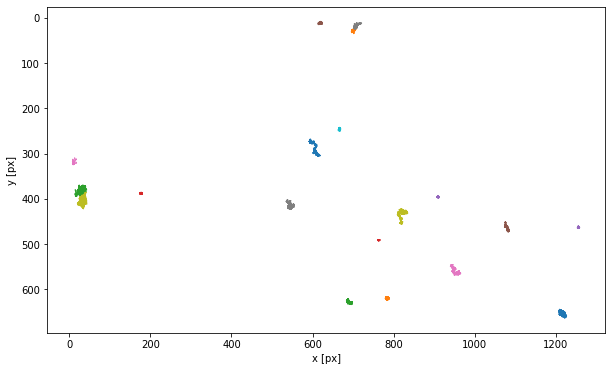

In [255]:
plt.figure()
tp.plot_traj(d0);

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


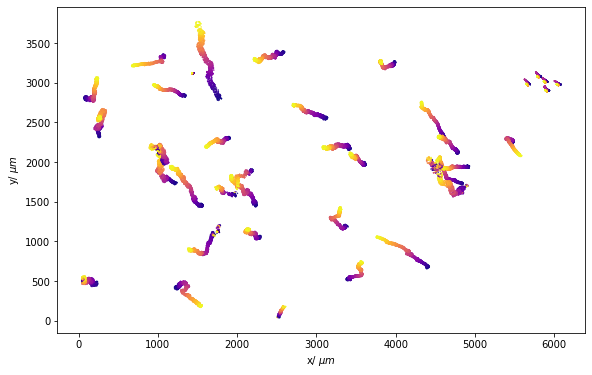

In [185]:
fig, ax = plt.subplots()

for i in list(set(d0["particle"])):
    d0i=d0[d0["particle"]==i]
    head=d0i['frame'].values[0]
    tail=d0i['frame'].values[-1]
    color=(d0i['frame'].values-head)/(tail-head)
    plt.scatter(d0i['x']*mpp,d0i['y']*mpp,linewidth=1,c=cm.plasma(color),s=0.2)
    #plt.plot(d0i['x'],d0i['y'],linewidth=1)
#plt.xlim(200,400)
#plt.ylim(0,200)
#plt.imshow(frames[0])
plt.xlabel(r'x/ $\mu m$')
plt.ylabel(r'y/ $\mu m$')
ax.set_aspect('equal')


#plt.plot(t_20_1['x'],t_20_1['y'],linewidth=0.8,c=cm.plasma(0.2),label="20Hz")

In [256]:
fps=1

In [260]:
set(d0["particle"])

{4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 23, 60, 97, 198}

In [288]:
particle1=d0[d0["particle"]==19]

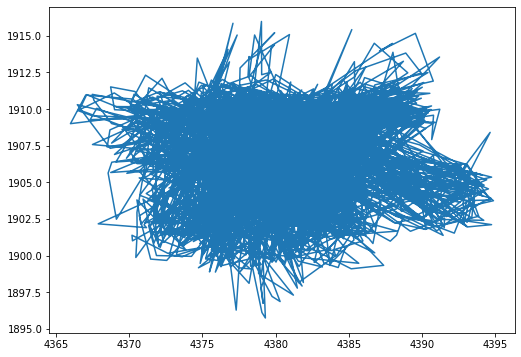

In [289]:
fig, ax = plt.subplots()
plt.plot(particle1['x']*mpp,particle1['y']*mpp)
ax.set_aspect('equal')

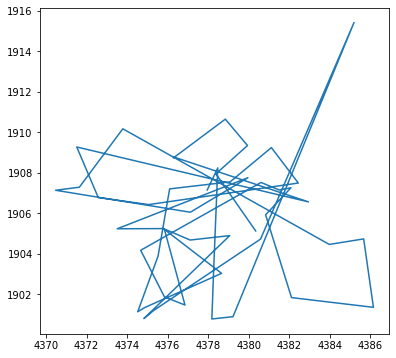

In [290]:
n=3
period=48
fig, ax = plt.subplots()
plt.plot(particle1['x'][period*n:period*(n+1)]*mpp,particle1['y'][period*n:period*(n+1)]*mpp)
ax.set_aspect('equal')

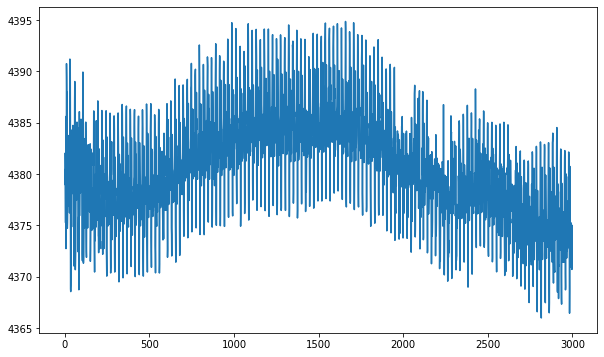

In [291]:
plt.plot(particle1['x'].values*mpp)
#plt.ylim(3250,3400)
#plt.xlim(10000,20000)

In [292]:
from statsmodels.tsa.seasonal import seasonal_decompose


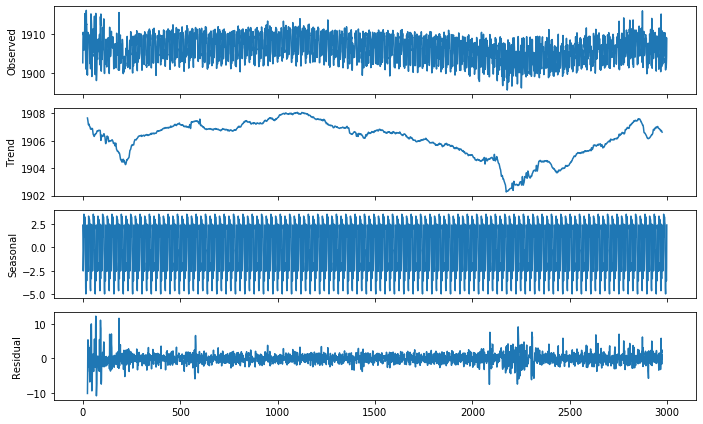

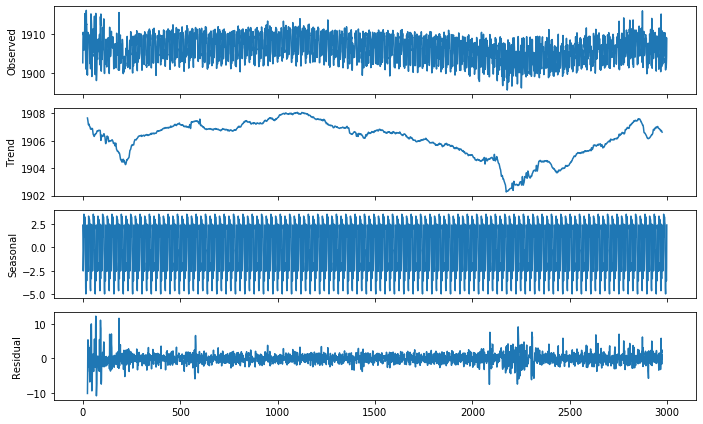

In [294]:


dates = np.arange(len(particle1['y'].values*mpp))
data = particle1['y'].values*mpp
df = pd.DataFrame({'data': data}, index=dates)

# Reproduce the example in OP
result=seasonal_decompose(df, model='additive', freq=48)
observe=result.observed
seasony=result.seasonal
tr=result.trend
res=result.resid
result.plot()

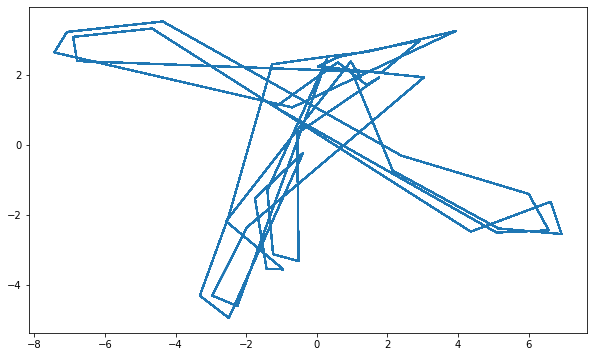

In [295]:
plt.plot(seasonx.values,seasony.values)